In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_movies = pd.read_csv("../Labb/Big/movies.csv")
df_ratings = pd.read_csv("../Labb/Big/ratings.csv")

# 1.1 Movielens full - EDA

# A

In [2]:
# EDA
df_movies.info(), df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


(None, None)

In [3]:
df_movies.describe()

,movieId
count,58098.000000
mean,111919.516197
std,59862.660956
min,1.000000
25%,72437.750000
50%,126549.000000
75%,161449.500000
max,193886.000000


In [4]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,2.775344e+07,2.775344e+07,2.775344e+07,2.775344e+07
mean,1.419420e+05,1.848800e+04,3.530445e+00,1.193122e+09
std,8.170740e+04,3.510263e+04,1.066353e+00,2.160482e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,7.117600e+04,1.097000e+03,3.000000e+00,9.986053e+08
50%,1.420220e+05,2.716000e+03,3.500000e+00,1.174256e+09
75%,2.124590e+05,7.150000e+03,4.000000e+00,1.422744e+09
max,2.832280e+05,1.938860e+05,5.000000e+00,1.537945e+09


In [5]:
df_ratings

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


In [6]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi


In [7]:
# Do some EDA

# Merge the two dataframes

df = pd.merge(df_movies, df_ratings, on='movieId')

#df[df['title'] == "Jumanji (1995)"]

<Axes: xlabel='rating'>

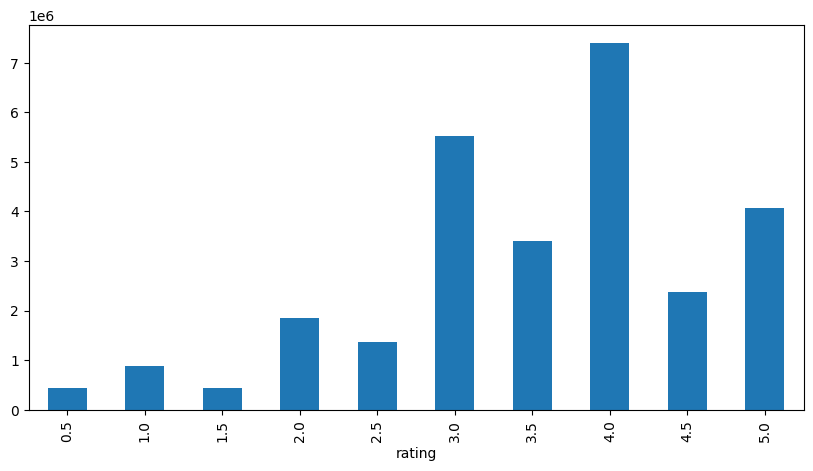

In [8]:
df.groupby('rating')['userId'].count().plot(kind='bar', figsize=(10, 5))

# B

Text(0.5, 1.0, 'Top 10 movies by number of ratings')

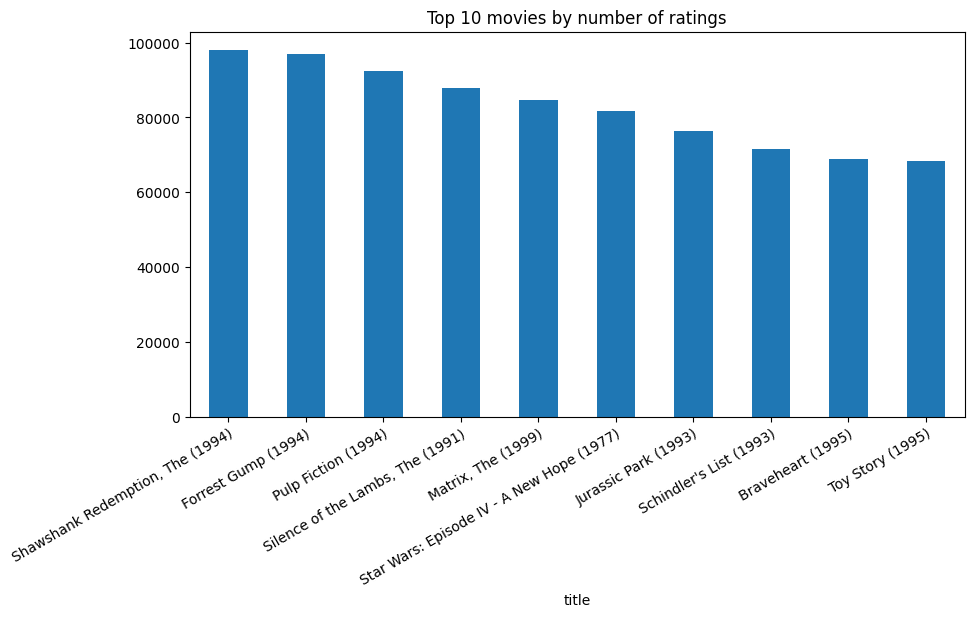

In [9]:
# sort movies by number of ratings

df.groupby('title')['userId'].count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=30, rotation_mode="anchor", ha="right");
plt.title('Top 10 movies by number of ratings')


In [10]:
top_rated_movies = df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

## C

In [11]:
# loop through list of top rated movies and plot the average ratings for each movie

for movie in top_rated_movies.index:
    average_rating = df[df['title'] == movie]['rating'].mean()
    print(f"{movie}: {average_rating:.2f}")


Shawshank Redemption, The (1994): 4.42
Forrest Gump (1994): 4.06
Pulp Fiction (1994): 4.17
Silence of the Lambs, The (1991): 4.15
Matrix, The (1999): 4.15
Star Wars: Episode IV - A New Hope (1977): 4.12
Jurassic Park (1993): 3.67
Schindler's List (1993): 4.26
Braveheart (1995): 4.01
Toy Story (1995): 3.89


## D

In [12]:
# creates new column with year of release
# extract the year from the title column using regex
# \( = start of expression
# (\d{4}) = 4 digits next to each other
# \) = end of expression
# $ all of the above must occur at the end of the string
# Source: https://stackoverflow.com/questions/64323346/extracting-year-from-a-column-of-string-movie-names
df["year"] = df["title"].str.extract(r"\((\d{4})\)$", expand=False)
df["year"] = pd.to_numeric(df["year"])

In [13]:
df['year'] = df['year'].fillna(0).astype(int) # converts from float to int

In [14]:
# finds all years between 1 and 2020 ()

df_years = df[(df['year'] > 1) & (df['year'] < 2022)] # removes all movies with year 0


In [15]:
df_years['year'].min(), df_years['year'].max()

(1874, 2018)

Text(0.5, 1.0, 'Number of movies released each year')

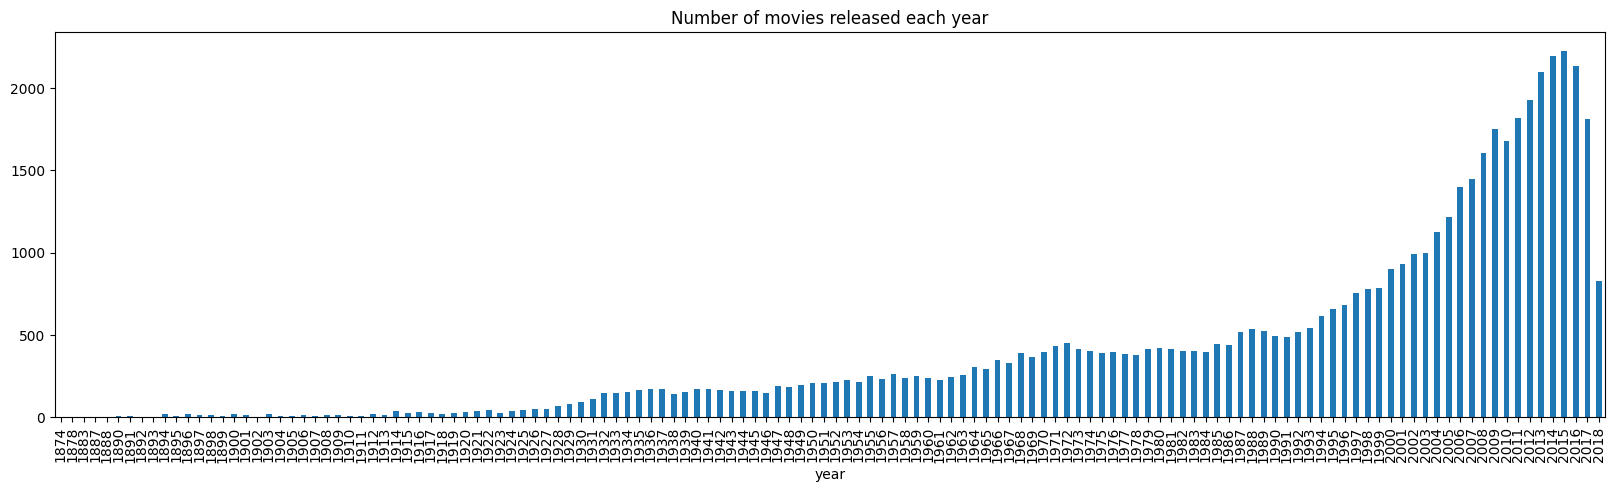

In [16]:
# plot the number of movies released each year

df_years.groupby('year')['title'].nunique().plot(kind='bar', figsize=(20, 5))
plt.title('Number of movies released each year')

C:\Users\Danne\AppData\Local\Temp\ipykernel_24352\3525288606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_years['decade'] = df_years['year'] // 10 * 10 #


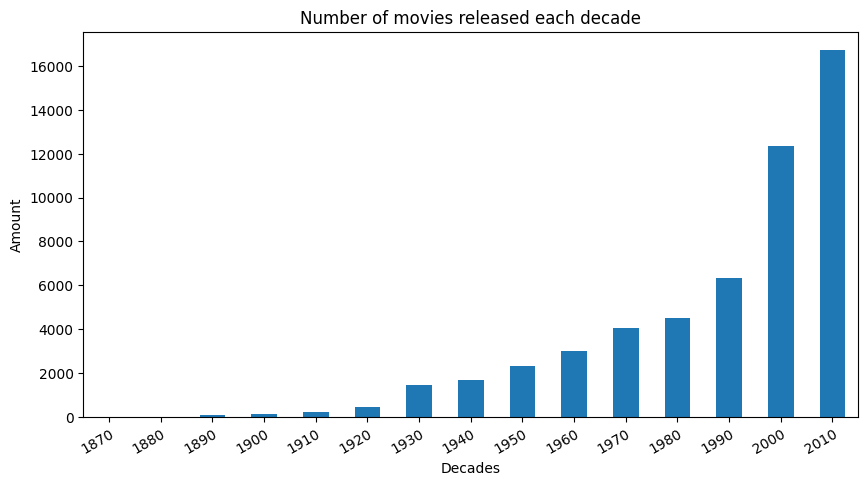

In [17]:
# groups up years in to decades which makes it easier to read the graph

df_years['decade'] = df_years['year'] // 10 * 10 # 

# change x-axis to show decades instead of years
df_years.groupby('decade')['title'].nunique().plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=30, rotation_mode="anchor", ha="right");
plt.xlabel('Decades')
plt.ylabel('Amount')
plt.title('Number of movies released each decade');

## E

In [18]:
# create a new column with the total ratings for each movie

df['total_ratings'] = df.groupby('title')['rating'].transform('count')

In [19]:
df

,movieId,title,genres,userId,rating,timestamp,year,total_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,4.0,1113765937,1995,68469
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,5.0,948885850,1995,68469
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5,1442169375,1995,68469
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,4.0,1370810063,1995,68469
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22,4.0,1237622631,1995,68469
...,...,...,...,...,...,...,...,...
27753439,193878,Les tribulations d'une caissière (2011),Comedy,176871,2.0,1537875080,2011,1
27753440,193880,Her Name Was Mumu (2016),Drama,81710,2.0,1537886232,2016,1
27753441,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,33330,2.0,1537890512,2017,1
27753442,193886,Leal (2018),Action|Crime|Drama,206009,2.5,1537917854,2018,2


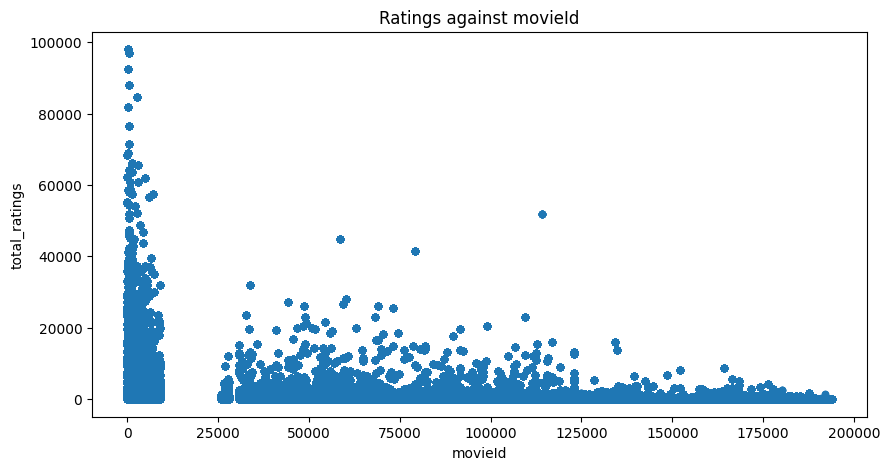

In [20]:
# not sure that this is correct, does not seem to make too much sense

df.plot(x='movieId', y='total_ratings', kind='scatter', figsize=(10, 5))
plt.title('Ratings against movieId');

In [21]:
len(df['movieId'].unique())

53889

In [22]:
len(df['rating'])

27753444

## F

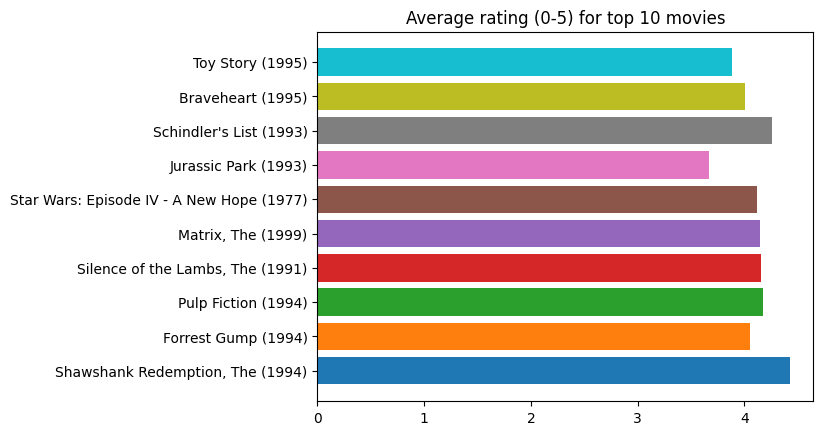

In [23]:
for movie in top_rated_movies.index:
    average_rating = df[df['title'] == movie]['rating'].mean()
    plt.barh(movie, average_rating)
    plt.title('Average rating (0-5) for top 10 movies')

# More EDA: 

In [24]:
# putting important lines of code to ease the process of re-running the code

df_movies = pd.read_csv("../Labb/Big/movies.csv")
df_ratings = pd.read_csv("../Labb/Big/ratings.csv")

df = pd.merge(df_movies, df_ratings, on='movieId')

df["year"] = df["title"].str.extract(r"\((\d{4})\)$", expand=False)
df["year"] = pd.to_numeric(df["year"])
df['year'] = df['year'].fillna(0).astype(int) # converts from float to int
df_years = df[(df['year'] > 1) & (df['year'] < 2022)]
df['average_rating'] = df.groupby('movieId')['rating'].transform('mean');
df['number_of_ratings'] = df.groupby('movieId')['rating'].transform('count');
df = df[df['number_of_ratings'] > 100]
df.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, '10 Lowest rated movies (50000+ ratings or more)')

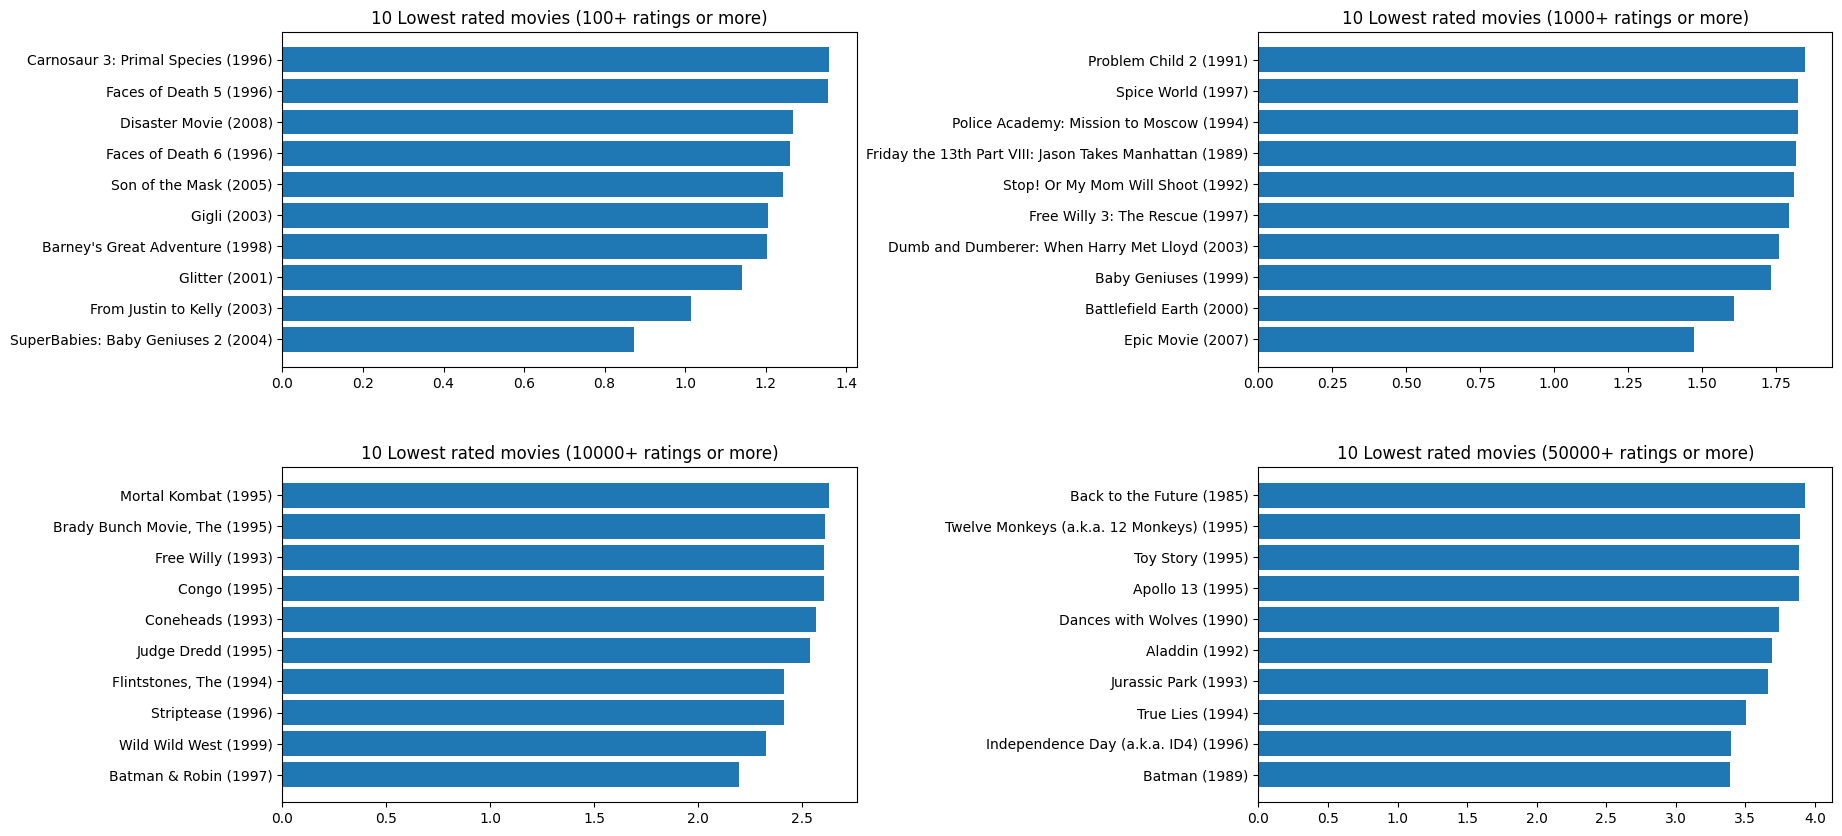

In [25]:
# Create subplots for the 10 lowest rated movies with different amount of ratings

df_lowest_rated = df.sort_values(by='average_rating', ascending=True)

# removes duplicates
df_lowest_rated = df_lowest_rated.drop_duplicates(subset='title', keep='first')

fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# change size of subplots
fig.subplots_adjust(hspace=0.3, wspace=0.7)

df_lowest_rated = df_lowest_rated[df_lowest_rated['number_of_ratings'] > 100]
axs[0, 0].barh(df_lowest_rated["title"].head(10), df_lowest_rated["average_rating"].head(10))
axs[0, 0].set_title('10 Lowest rated movies (100+ ratings or more)')

df_lowest_rated = df_lowest_rated[df_lowest_rated['number_of_ratings'] > 1000]
axs[0, 1].barh(df_lowest_rated["title"].head(10), df_lowest_rated["average_rating"].head(10))
axs[0, 1].set_title('10 Lowest rated movies (1000+ ratings or more)')

df_lowest_rated = df_lowest_rated[df_lowest_rated['number_of_ratings'] > 10000]
axs[1, 0].barh(df_lowest_rated["title"].head(10), df_lowest_rated["average_rating"].head(10))
axs[1, 0].set_title('10 Lowest rated movies (10000+ ratings or more)')

df_lowest_rated = df_lowest_rated[df_lowest_rated['number_of_ratings'] > 50000]
axs[1, 1].barh(df_lowest_rated["title"].head(10), df_lowest_rated["average_rating"].head(10))
axs[1, 1].set_title('10 Lowest rated movies (50000+ ratings or more)')

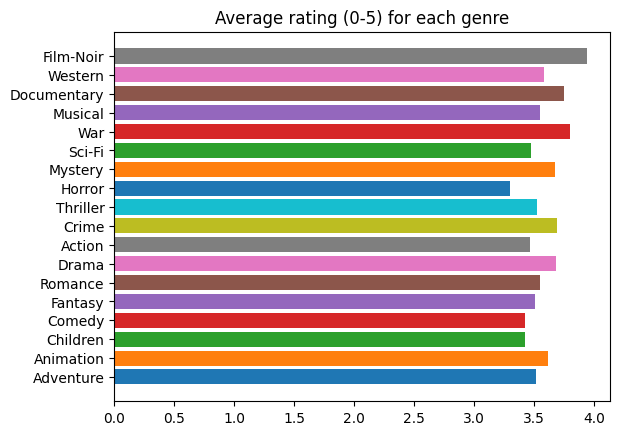

In [26]:
# compare the average rating for each genre

# since df['genres'] includes multiple genres for each movie, I needed to split them up and loop through this list instead
# These are all the genres i could find in the dataset
genre_list = ["Adventure", "Animation", "Children", "Comedy", "Fantasy", "Romance", "Drama", "Action", "Crime", "Thriller", "Horror", "Mystery", "Sci-Fi", "War", "Musical", "Documentary", "Western", "Film-Noir"]
sorting_list = []

for genre in genre_list:
    average_rating = df[df['genres'].str.contains(genre)]['average_rating'].mean()
    sorting_list.append([genre, average_rating])
    plt.barh(genre, average_rating)
    plt.title('Average rating (0-5) for each genre')

In [27]:
# sorts the list by the second element in each list (the average rating)
sorting_list.sort(key=lambda x: x[1], reverse=True) # source: https://stackoverflow.com/questions/3766633/how-to-sort-with-lambda-in-python

for i in range(len(sorting_list)):
    print(f"{sorting_list[i][0]}: {sorting_list[i][1]:.2f}")

Film-Noir: 3.94
War: 3.80
Documentary: 3.75
Crime: 3.69
Drama: 3.69
Mystery: 3.67
Animation: 3.61
Western: 3.59
Musical: 3.55
Romance: 3.55
Thriller: 3.52
Adventure: 3.52
Fantasy: 3.51
Sci-Fi: 3.48
Action: 3.47
Children: 3.43
Comedy: 3.42
Horror: 3.30


# 1.2 Create a sparse matrix

- Removes certain genres I'm not interested in
- Most movies that has a score below 3.5 are very hit or miss, while movies that I watch that are 4 or greater are almost always pretty good
- removed movies with less than 1000 ratings because it will also be very hit or miss whether the rating is accurate or not.
- removes all movies made before 1970
- removes all movies with an average score below 3.5

In [28]:
df_movies = pd.read_csv("../Labb/Big/movies.csv")
df_ratings = pd.read_csv("../Labb/Big/ratings.csv")


df = pd.merge(df_movies, df_ratings, on='movieId')

df["year"] = df["title"].str.extract(r"\((\d{4})\)$", expand=False)
df["year"] = pd.to_numeric(df["year"])
df['year'] = df['year'].fillna(0).astype(int) # converts from float to int
df_years = df[(df['year'] > 1) & (df['year'] < 2022)]

In [29]:
# for loop that removes certain genres from the dataset
genrelist = ["Children", "Sci-Fi", "Musical", "Documentary", "Western"]
for genre in genrelist:
    df = df[df['genres'].str.contains(genre) == False]

# remove all movies that were created before 1970
df = df[df['year'] > 1970]

In [30]:
# Creates two new columns that include the average rating and number of ratings for each movie
df['average_rating'] = df.groupby('movieId')['rating'].transform('mean');
df['number_of_ratings'] = df.groupby('movieId')['rating'].transform('count');
df.reset_index(drop=True, inplace=True)

In [31]:
df = df[df['average_rating'] > 3.5]
df = df[df['number_of_ratings'] > 1000]

In [32]:
len(df['title'].unique()) # 816 unique movie titles left in dataset, which is not too much and not too little

1214

In [33]:
# Converting timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], unit = "s")
df

,movieId,title,genres,userId,rating,timestamp,year,average_rating,number_of_ratings
34048,6,Heat (1995),Action|Crime|Thriller,4,4.5,2005-04-17 19:47:22,1995,3.844211,28683
34049,6,Heat (1995),Action|Crime|Thriller,18,3.0,1996-10-11 19:22:18,1995,3.844211,28683
34050,6,Heat (1995),Action|Crime|Thriller,19,4.0,1996-07-03 22:45:32,1995,3.844211,28683
34051,6,Heat (1995),Action|Crime|Thriller,39,3.0,2004-02-21 03:35:39,1995,3.844211,28683
34052,6,Heat (1995),Action|Crime|Thriller,51,3.0,1999-03-22 11:59:57,1995,3.844211,28683
...,...,...,...,...,...,...,...,...,...
18151516,180031,The Shape of Water (2017),Adventure|Drama|Fantasy,282374,4.0,2018-03-16 23:15:15,2017,3.599457,1473
18151517,180031,The Shape of Water (2017),Adventure|Drama|Fantasy,282405,3.5,2018-02-26 23:19:21,2017,3.599457,1473
18151518,180031,The Shape of Water (2017),Adventure|Drama|Fantasy,282670,2.5,2018-06-02 14:35:18,2017,3.599457,1473
18151519,180031,The Shape of Water (2017),Adventure|Drama|Fantasy,283000,3.5,2018-02-09 01:59:08,2017,3.599457,1473


In [34]:
# create sparse matrix using scipy.sparse.csc_matrix()

from scipy.sparse import csc_matrix

# create a pivot table with movieId as index, userId as columns and ratings as values

pivot_table = df.pivot_table(index='movieId', columns='userId', values='rating').fillna(0)

In [35]:
mat_movies_users = csc_matrix(pivot_table.values)

In [36]:
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
model_knn.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [37]:
# remove all movies that are in df_movies but not in df

df_movies = df_movies[df_movies['title'].isin(df['title'])].reset_index(drop=True)

df_movies

,movieId,title,genres
0,6,Heat (1995),Action|Crime|Thriller
1,11,"American President, The (1995)",Comedy|Drama|Romance
2,16,Casino (1995),Crime|Drama
3,17,Sense and Sensibility (1995),Drama|Romance
4,21,Get Shorty (1995),Comedy|Crime|Thriller
...,...,...,...
1211,175303,It (2017),Horror
1212,175569,Wind River (2017),Action|Crime|Mystery|Thriller
1213,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
1214,177615,Lady Bird (2017),Comedy


In [38]:
df_movies

,movieId,title,genres
0,6,Heat (1995),Action|Crime|Thriller
1,11,"American President, The (1995)",Comedy|Drama|Romance
2,16,Casino (1995),Crime|Drama
3,17,Sense and Sensibility (1995),Drama|Romance
4,21,Get Shorty (1995),Comedy|Crime|Thriller
...,...,...,...
1211,175303,It (2017),Horror
1212,175569,Wind River (2017),Action|Crime|Mystery|Thriller
1213,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama
1214,177615,Lady Bird (2017),Comedy


In [49]:
# create a recommender system where the user can input a movie and get 10 recommendations

def recommender(movie_name, data, model, n_recommendations):
    model.fit(data) # Fitting the model
    idx=process.extractOne(movie_name, df_movies['title'])[2] # Extracting the index of the movie
    print('Movie Selected: ', df_movies['title'][idx], 'Index: ', idx) # Printing the movie and index
    print('Searching for recommendations...') # Printing message
    distances, indices = model.kneighbors(data[idx], n_neighbors=n_recommendations+1) # Extracting distances and indices
    print(distances, indices[0])
    for i in range(1, len(indices[0])):
        print(df_movies['title'][indices[0][i]])

recommender('Heat', mat_movies_users, model_knn, 10)

Movie Selected:  Heat (1995) Index:  0
Searching for recommendations...
[[3.52717855e-13 5.22780855e-01 5.51676413e-01 5.65342280e-01
  5.73217013e-01 5.85552656e-01 5.95707127e-01 5.97948556e-01
  6.04277514e-01 6.04838672e-01 6.07987490e-01]] [  0 129   2  11 119  12   5  62 116  96 144]
Rock, The (1996)
Casino (1995)
Seven (a.k.a. Se7en) (1995)
Fargo (1996)
Usual Suspects, The (1995)
Leaving Las Vegas (1995)
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)
True Romance (1993)
Fugitive, The (1993)
Die Hard (1988)


- Distances: hur många procent similar en film är jämfört med vad vi söker på
- Indices: vilken rad (index) som filmen ligger på.
- Jag tror att det logiska felet är att man lägger indexen på "movieId" istället för "titel".
- Om vi skriver ut och jämför indexen med movieId från uppvärmningen så kan vi se att varje film som är vald är också väldigt lik idexen.
- Detta händer inte om vi byter till "title" som index istället. Filmerna som rekommenderas blir också ganska lika genre-vis

* Heat - American crime drama (8,3)
* The Bank Job -  heist thriller film (7.2)
* The Revenant - American action drama film (8.0)
* A Man For All Seasons -  historical drama film (7.7)
* Dial M For Murder - crime thriller film (8.2)
* Gangs of New York - epic historical drama film (7.5)
* Enter the Dragon - martial arts film (7.6)
* Lost Horizon - musical fantasy adventure film (7.6)
* The Magdalene Sisters - drama film (7.7)
* Temple Grandin - biographical drama television film (8.2)
* Ray - biographical drama (7.7)

0
5
5
5


IndexError: list index out of range